### Importing modules

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocess to get training / testing set

In [40]:
y_train = df_train['Survived']

X_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [41]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [42]:
mean_age = X_train['Age'].mean()
X_train.loc[:, 'Age'] = X_train['Age'].replace(np.nan, mean_age)

mode_embarked = X_train['Embarked'].mode()[0]
X_train.loc[:, 'Embarked'] = X_train['Embarked'].replace(np.nan, mode_embarked)

X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [43]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [46]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Building models

KNN

In [52]:
knn = KNeighborsClassifier()
parameters_knn = {'n_neighbors': np.arange(3, 20, 2),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn_cv = GridSearchCV(knn, parameters_knn).fit(X_train, y_train)
y_hat_knn = knn_cv.predict(X_train)

In [56]:
knn_accuracy = accuracy_score(y_train, y_hat_knn)
knn_jaccard = jaccard_score(y_train, y_hat_knn)
knn_f1 = f1_score(y_train, y_hat_knn)

print(classification_report(y_train, y_hat_knn))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       549
           1       0.85      0.72      0.78       342

    accuracy                           0.84       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



Logistic regression

In [57]:
lr = LogisticRegression()
parameters_lr = {'C': np.logspace(-3, 2),
              'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'sag']}

lr_cv = GridSearchCV(lr, parameters_lr).fit(X_train, y_train)
y_hat_lr = lr_cv.predict(X_train)

In [58]:
lr_accuracy = accuracy_score(y_train, y_hat_lr)
lr_jaccard = jaccard_score(y_train, y_hat_lr)
lr_f1 = f1_score(y_train, y_hat_lr)

print(classification_report(y_train, y_hat_lr))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       549
           1       0.78      0.66      0.72       342

    accuracy                           0.80       891
   macro avg       0.80      0.77      0.78       891
weighted avg       0.80      0.80      0.80       891



SVM

In [59]:
svm = SVC()
parameters_svm = {'C': np.logspace(-3, 2),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm_cv = GridSearchCV(svm, parameters_svm).fit(X_train, y_train)
y_hat_svm = svm_cv.predict(X_train)

In [60]:
svm_accuracy = accuracy_score(y_train, y_hat_svm)
svm_jaccard = jaccard_score(y_train, y_hat_svm)
svm_f1 = f1_score(y_train, y_hat_svm)

print(classification_report(y_train, y_hat_svm))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       549
           1       0.85      0.71      0.77       342

    accuracy                           0.84       891
   macro avg       0.84      0.81      0.82       891
weighted avg       0.84      0.84      0.84       891



Random forest

In [61]:
forest = RandomForestClassifier()
parameters_forest = {'criterion': ['gini', 'entropy', 'log_loss'],
                     'max_depth': np.arange(5, 15),
                     'max_features': ['sqrt', 'log2'],
                     'ccp_alpha': np.logspace(-3, 1)}

forest_cv = GridSearchCV(forest, parameters_forest).fit(X_train, y_train)
y_hat_forest = forest_cv.predict(X_train)

In [62]:
forest_accuracy = accuracy_score(y_train, y_hat_forest)
forest_jaccard = jaccard_score(y_train, y_hat_forest)
forest_f1 = f1_score(y_train, y_hat_forest)

print(classification_report(y_train, y_hat_forest))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       549
           1       0.98      0.92      0.95       342

    accuracy                           0.96       891
   macro avg       0.97      0.95      0.96       891
weighted avg       0.96      0.96      0.96       891



In [70]:
forest_predictor = forest_cv.best_estimator_
forest_predictor

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=13,
                       max_features='log2')

### Evaluation

<Axes: >

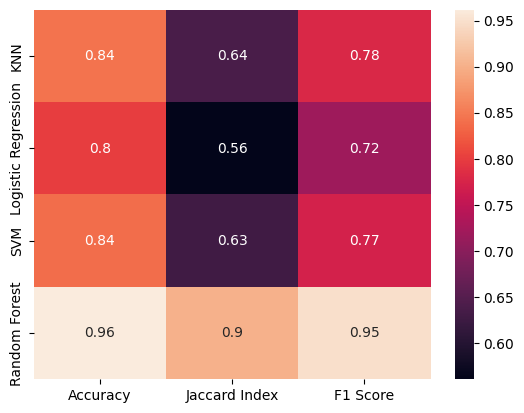

In [68]:
df_results = pd.DataFrame({'Accuracy': [knn_accuracy, lr_accuracy, svm_accuracy, forest_accuracy],
                           'Jaccard Index': [knn_jaccard, lr_jaccard, svm_jaccard, forest_jaccard],
                           'F1 Score': [knn_f1, lr_f1, svm_f1, forest_f1]}, index=['KNN', 'Logistic Regression', 'SVM', 'Random Forest'])

sns.heatmap(df_results, annot=True)

### Best model predictions

In [69]:
model = forest_cv.best_estimator_
y_test = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test})
output.to_csv('output.csv', index=False)